# 12-752: Data-Driven Building Energy Management
## Fall 2016, Carnegie Mellon University

## Assignment \#2

We will begin by unpickling the dataset we had played around with in Lecture 4. But first, we will load most modules we will be using:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

To unpickle just do this:

In [2]:
pickle_file = open('campusDemand.pkl','rb')
pickled_data = pickle.load(pickle_file)
pickle_file.close()

# Since we pickled them all together as a list, I'm going to assign each element of the list to the same variable
# we had been using before:
data = pickled_data[0]
pointNames = pickled_data[1]
data_by_day = pickled_data[2]
idx = pickled_data[3]

## -=-=-= Exploring hourly and weekly consumption patterns (no seasonality) =-=-=-

# Task \#1 (10%)

Create a new Pandas Data Frame that contains only two columns (Time and Value) and only the rows that belong to the University-wide meter (Electric kW Calculations Main Campus). In other words, get rid of the Point Name column and select only the rows for the campus meter.

In [3]:
# Your code goes here
pickle_file = open('campusDemand.pkl','rb')
pickled_data = pickle.load(pickle_file)
pickle_file.close()

# Since we pickled them all together as a list, I'm going to assign each element of the list to the same variable
# we had been using before:
data = pickled_data[0]
pointNames = pickled_data[1]
data_by_day = pickled_data[2]
idx = pickled_data[3]

data['Point name'].value_counts()

# data['Point name'== Electric kW Calculations - Main Campus kW]

ek=data.loc[data['Point name'] == 'Electric kW Calculations - Main Campus kW']

ek = ek.drop(ek.columns[0],axis=1)

ek[['Time','Value']]

# ek.describe()

,Time,Value
152348,2013-11-10 00:00:30,8367.816250
152349,2013-11-10 00:01:30,8287.111375
152350,2013-11-10 00:02:30,8340.608125
152351,2013-11-10 00:03:30,8342.061625
152352,2013-11-10 00:04:30,8341.360375
152353,2013-11-10 00:05:30,8343.680875
152354,2013-11-10 00:06:30,8335.307125
152355,2013-11-10 00:07:30,8294.368000
152356,2013-11-10 00:08:30,8327.415375
152357,2013-11-10 00:09:30,8287.635875


# Task \#2 (10%)

In one figure, plot one histogram showing the average hourly consumption on the entire dataset.
In a separate figure, plot 7 subplots with similar histograms but now showing the average hourly consumption for each day of the weeek (hence the 7 supplots).

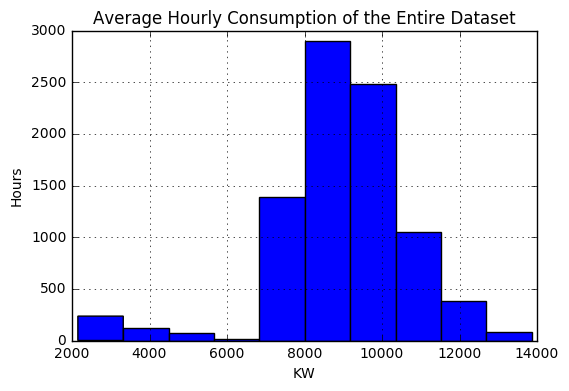

In [4]:
# Your code goes here
ek_2 = ek.set_index('Time')

ek_2.index=pd.to_datetime(ek_2.index)

ek_hourly = ek_2.resample('H').mean()

ek_hourly['Value'].hist()

plt.title('Average Hourly Consumption of the Entire Dataset')
plt.xlabel('KW')
plt.ylabel('Hours')

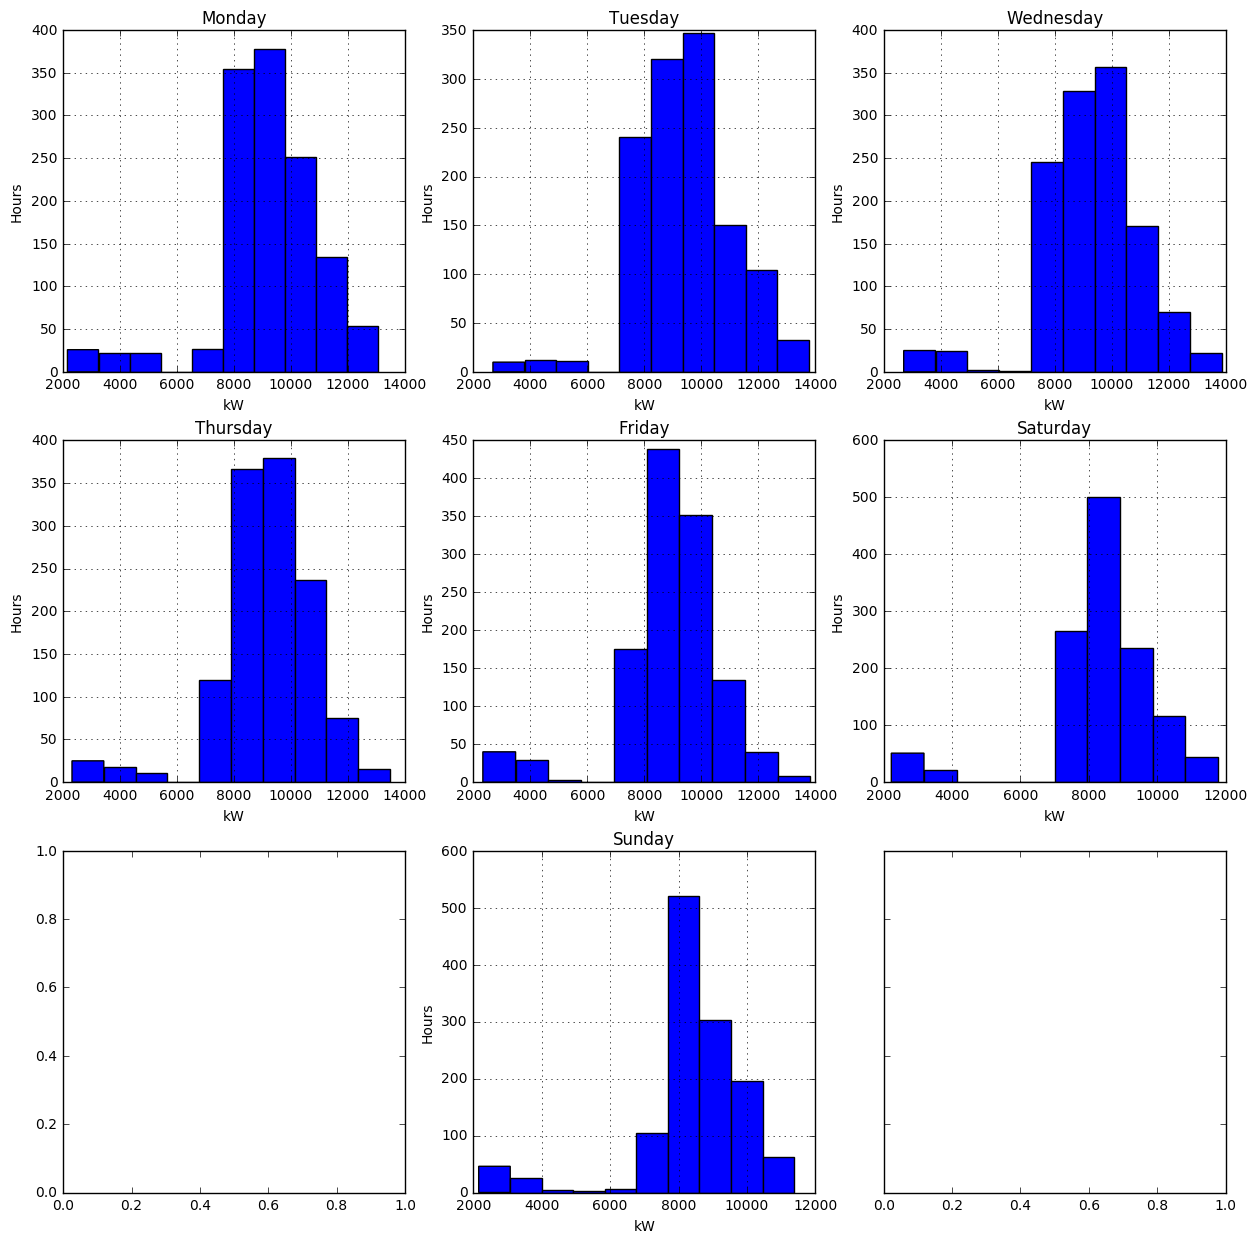

In [5]:
ek_10=ek_2.resample('H').mean()
ek['Weekday']=ek['Time'].dt.dayofweek

ek_3=ek

ek_3['Weekday']=ek['Time'].dt.dayofweek

ek_10=ek_3.set_index('Time')

# ek_11=ek_11.drop(ek_11.columns[2],axis=1)

ek_11=ek_10.resample('H').mean()

Mondays = ek_3[ek_3['Weekday'] ==0 ]
Tuesdays = ek_3[ek_3['Weekday'] ==1 ]
Wednesdays = ek_3[ek_3['Weekday'] ==2 ]
Thursdays = ek_3[ek_3['Weekday'] ==3 ]
Fridays = ek_3[ek_3['Weekday'] ==4 ]
Saturdays = ek_3[ek_3['Weekday'] ==5 ]
Sundays = ek_3[ek_3['Weekday'] ==6 ]

Wd=ek_11.groupby('Weekday')

Sunday1 = Sundays.set_index('Time')

Sunday =Sunday1.resample('H').mean()

Monday1 = Mondays.set_index('Time')

Monday =Monday1.resample('H').mean()

Tuesday1 = Tuesdays.set_index('Time')

Tuesday =Tuesday1.resample('H').mean()

Wednesday1 = Wednesdays.set_index('Time')

Wednesday =Wednesday1.resample('H').mean()

Thursday1 = Thursdays.set_index('Time')

Thursday =Thursday1.resample('H').mean()

Friday1 = Fridays.set_index('Time')

Friday =Friday1.resample('H').mean()

Saturday1 = Saturdays.set_index('Time')

Saturday =Saturday1.resample('H').mean()

fig, ax=plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True,figsize=(15,15))

plt.figure(1)
plt.subplot(331)
Monday['Value'].hist()
plt.ylabel('Hours')
plt.xlabel('kW')
plt.title('Monday')


plt.subplot(332)
Tuesday['Value'].hist()
plt.ylabel('Hours')
plt.xlabel('kW')
plt.title('Tuesday')


plt.subplot(333)
Wednesday['Value'].hist()
plt.ylabel('Hours')
plt.xlabel('kW')
plt.title('Wednesday')


plt.subplot(334)
Thursday['Value'].hist()
plt.ylabel('Hours')
plt.xlabel('kW')
plt.title('Thursday')


plt.subplot(335)
Friday['Value'].hist()
plt.ylabel('Hours')
plt.xlabel('kW')
plt.title('Friday')


plt.subplot(336)
Saturday['Value'].hist()
plt.ylabel('Hours')
plt.xlabel('kW')
plt.title('Saturday')


plt.subplot(338)
Sunday['Value'].hist()
plt.ylabel('Hours')
plt.xlabel('kW')
plt.title('Sunday')

# Wd.hist()

# Task \#3 (10%)

In one figure, create a box plot of the average hourly electricity consumption for each hour of the day (i.e., your plot will show 24 *boxes*, one for each hour of the day, and each *box* will represent the distribution of the average hourly consumption in the dataset for that hour).

In another figure, create 7 subplots showing the same box plots as above, but now for each of the seven days of the week.

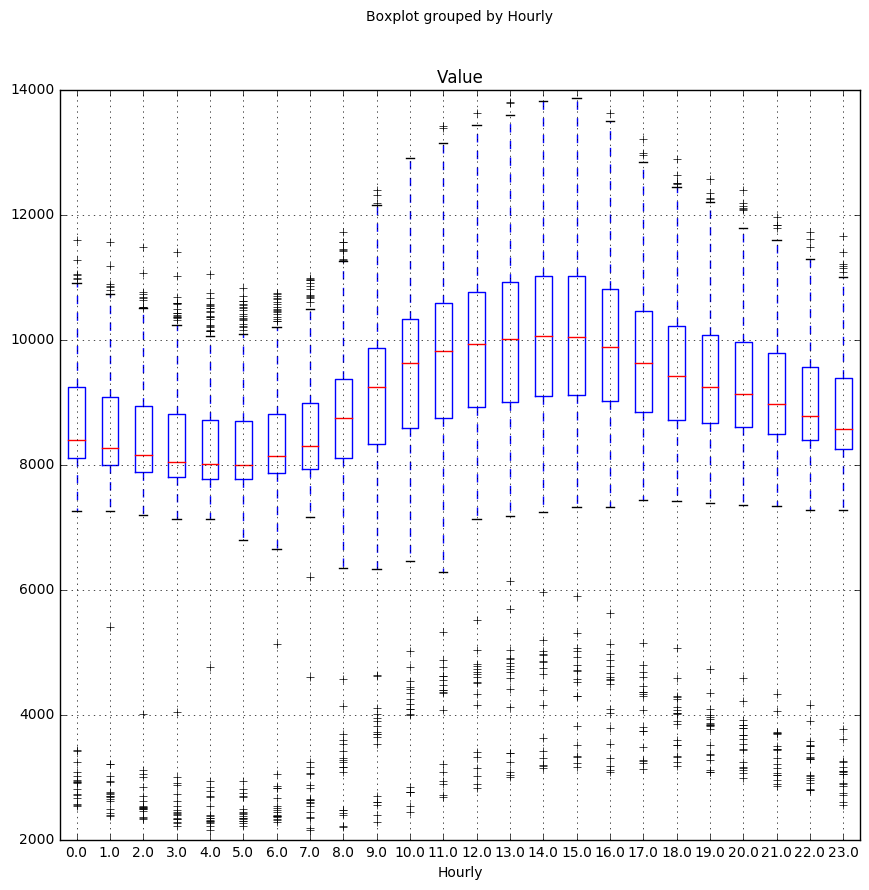

In [6]:
# Your code goes here
ek_3['Hourly']=ek_3['Time'].dt.hour
do=ek_3.set_index('Time')
do1=do.resample('H').mean()
do1.boxplot(column='Value',by='Hourly',figsize=(10,10))

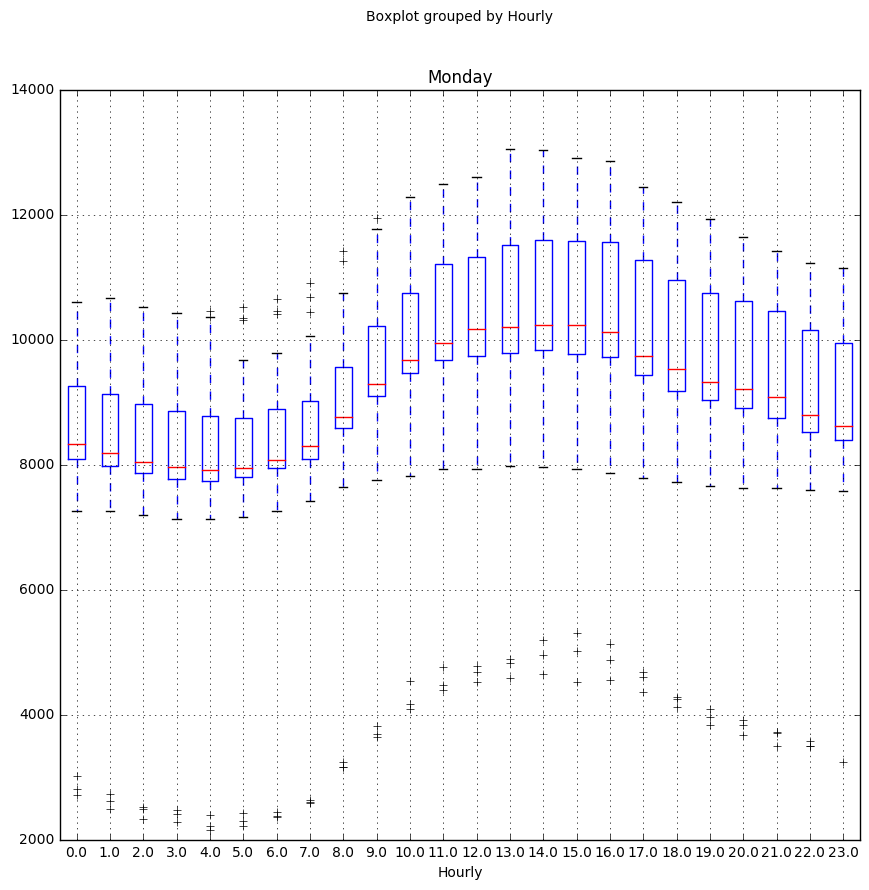

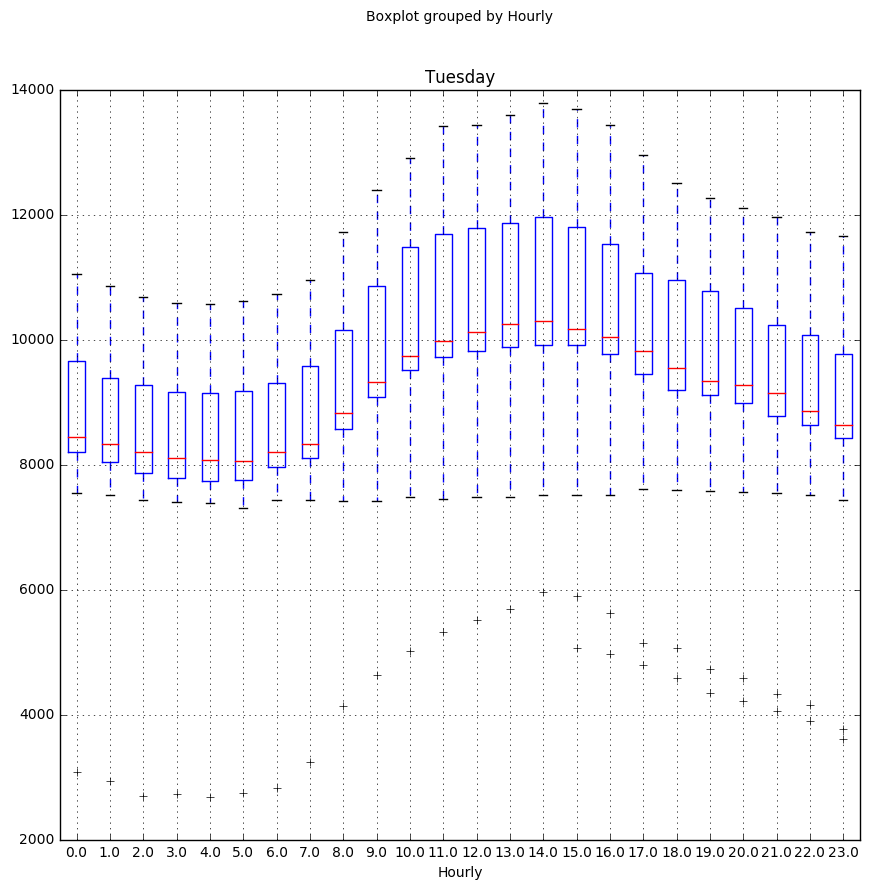

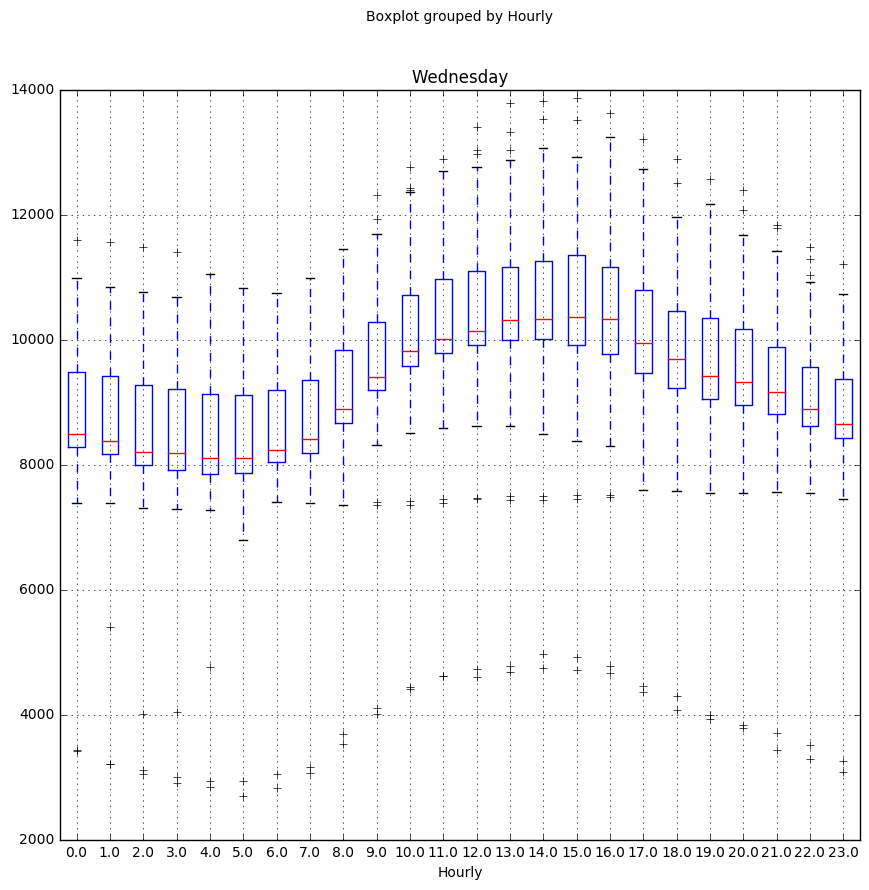

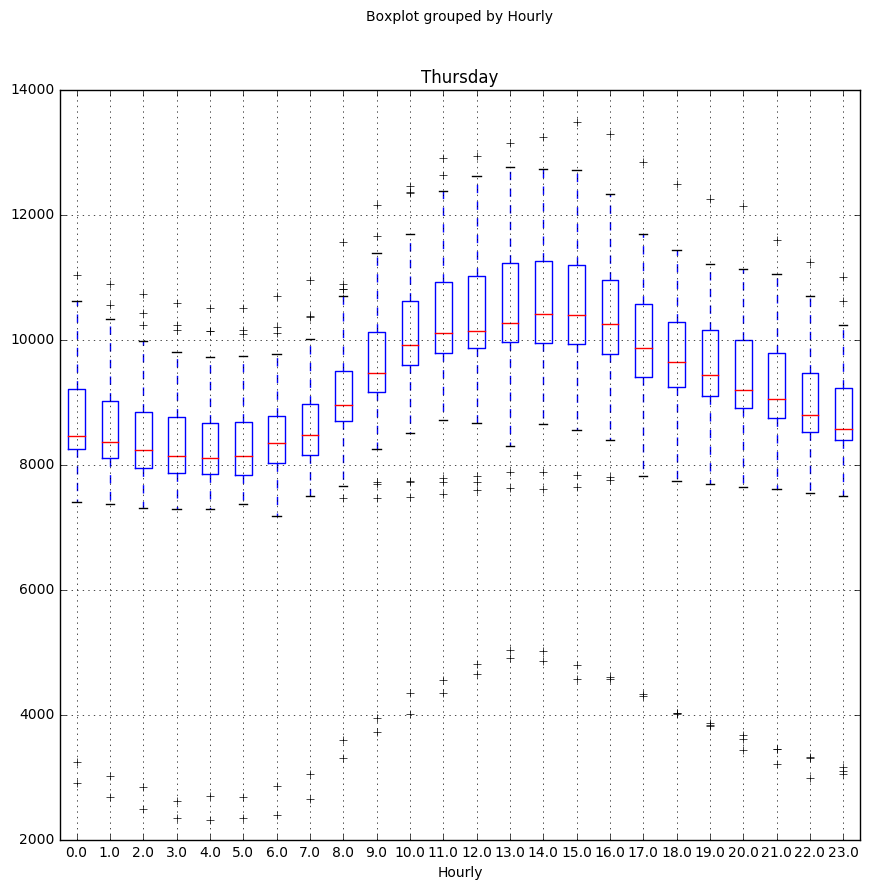

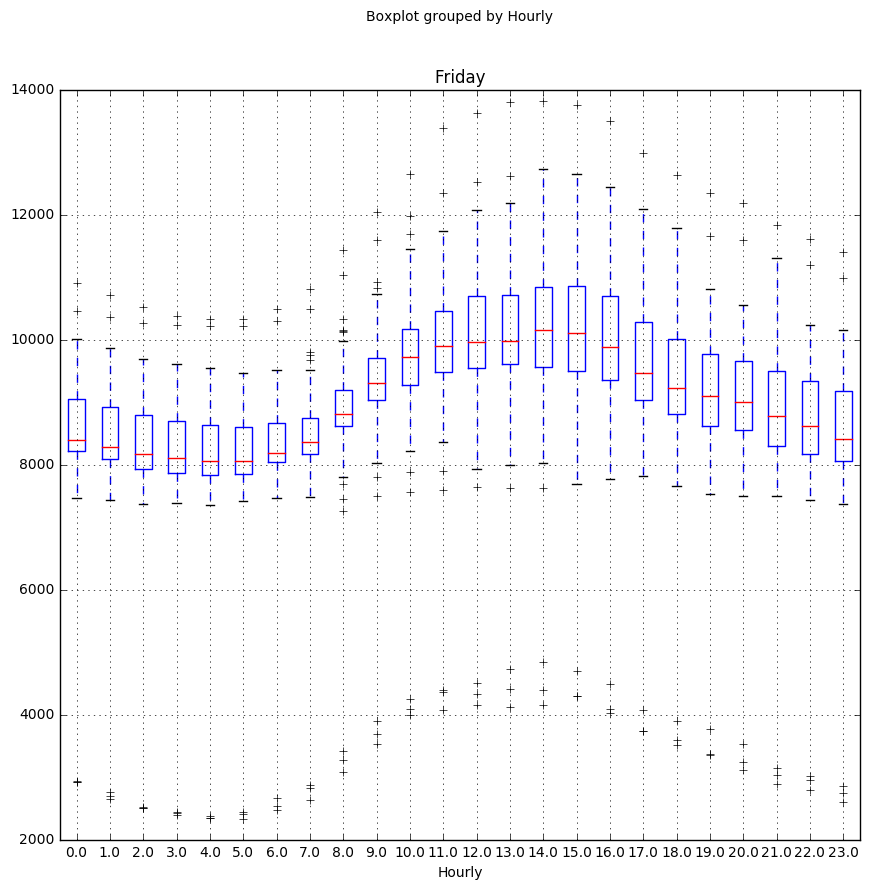

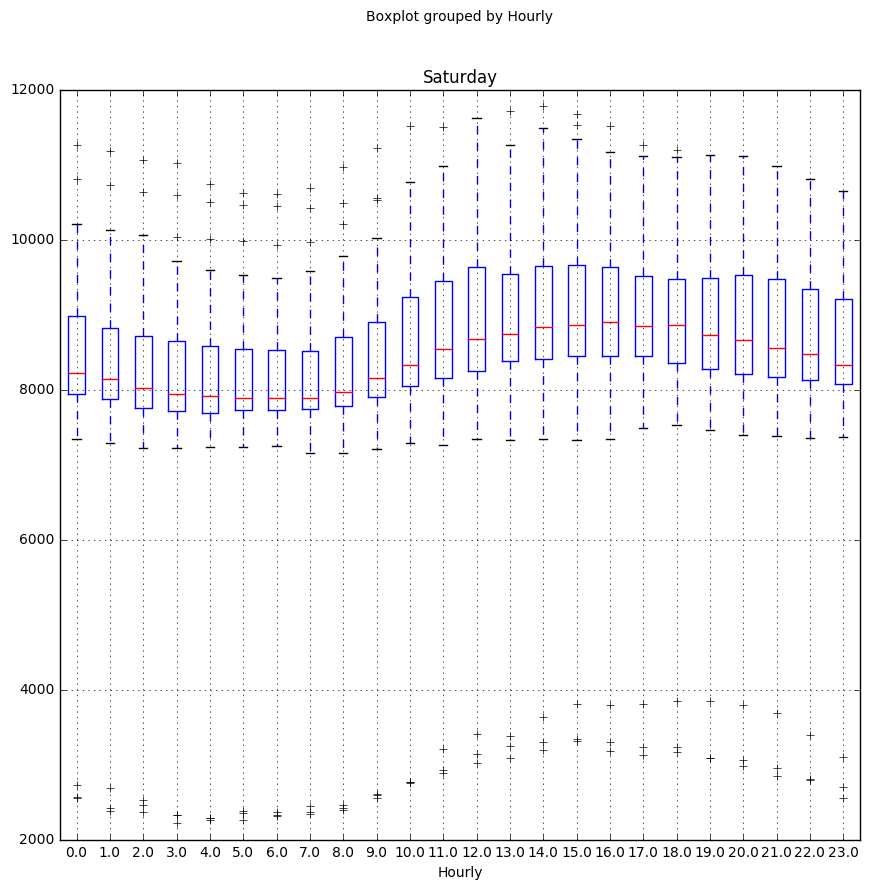

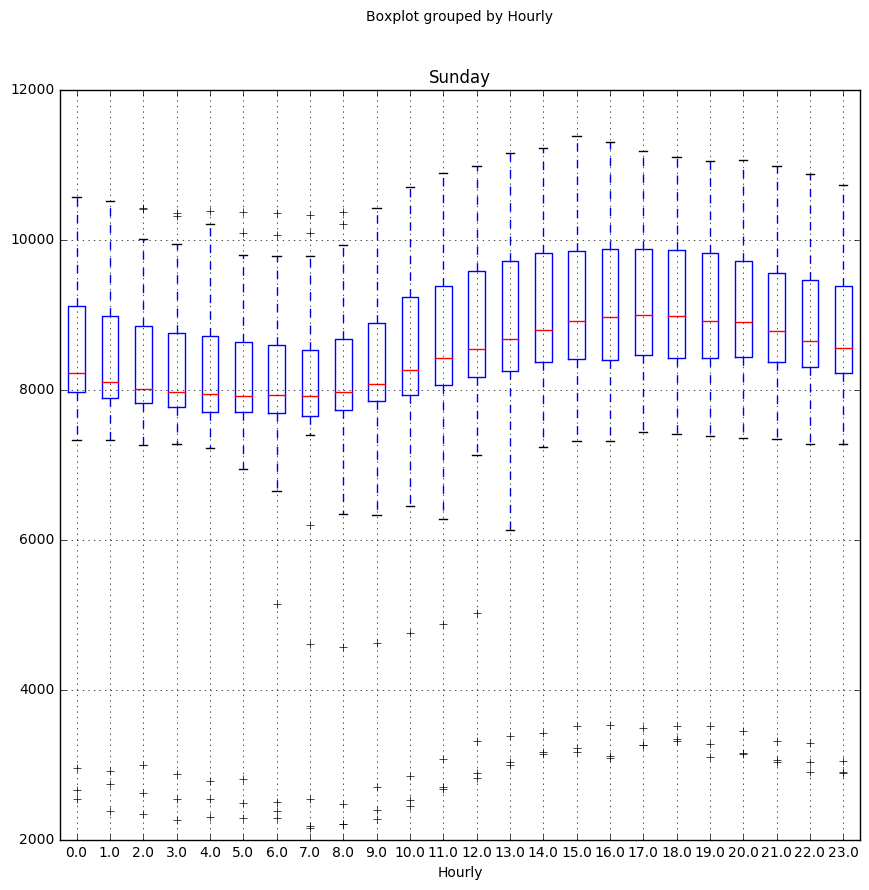

In [7]:
Monday_A = do1[do1['Weekday'] ==0 ]
Tuesday_A = do1[do1['Weekday'] ==1 ]
Wednesday_A = do1[do1['Weekday'] ==2 ]
Thursday_A = do1[do1['Weekday'] ==3 ]
Friday_A = do1[do1['Weekday'] ==4 ]
Saturday_A = do1[do1['Weekday'] ==5 ]
Sunday_A = do1[do1['Weekday'] ==6 ]

Monday_A.boxplot(column='Value',by='Hourly',figsize=(10,10))
plt.title('Monday')

Tuesday_A.boxplot(column='Value',by='Hourly',figsize=(10,10))
plt.title('Tuesday')

Wednesday_A.boxplot(column='Value',by='Hourly',figsize=(10,10))
plt.title('Wednesday')

Thursday_A.boxplot(column='Value',by='Hourly',figsize=(10,10))
plt.title('Thursday')

Friday_A.boxplot(column='Value',by='Hourly',figsize=(10,10))
plt.title('Friday')

Saturday_A.boxplot(column='Value',by='Hourly',figsize=(10,10))
plt.title('Saturday')

Sunday_A.boxplot(column='Value',by='Hourly',figsize=(10,10))
plt.title('Sunday')

## -=-=-= Exploring seasonal effects =-=-=-

# Task \#4 (10%)

Create a **stem plot** of the average daily electricity consumption for the whole dataset (i.e., the plot should have ~365 stems):

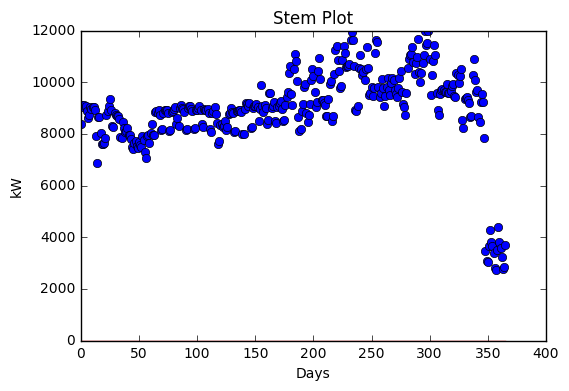

In [8]:
# Your code goes here
ek_4 = ek_2.resample('H').mean()

ek_4['Weekday']=ek['Time'].dt.dayofweek

del ek_4['Weekday']

ek_4.resample('H').mean()

ek_5=ek_4.resample('D').mean()

ek_5

plt.stem(ek_5,' ')
plt.title('Stem Plot')
plt.xlabel('Days')
plt.ylabel('kW')

# plt.stem(ek_5)

# Task #5 (10%)

What are your findings so far? Please elaborate on how the above plots and analysis have informed you about the data. 


*Your answer goes here...*

Task1: I was able to find that the desired meter (Electric KW - Main Campus) had 522410 rows of data in the pickle dataset. The mean of the dataset is 8965.47 kW, with a standard deviation of 1767.44 kW. The minimum and maximum values reported were 1641.14 kW and 14093.15 kW respectively.

Task2: From the entire datasets histogram, we can see that a major part of the year has a load of about 8000-9000 kW. Coming to the weekly data's histograms, we can see how peak demand varies over the days of the week for all the hours of the year. I realized taking averages, in someway, helps in losing key information. Similar to the theory of taking global surface mean temperatures as a key indicator of climate change.

Task3: From the yearly box plot we can see that the median consumption is very similar to a normal curve, with the peak around noon, between 12:00pm and 2:00pm. We can also see that there are several outliers in the dataset, i.e. data points outside the min and max values of the boxes. If we look at the weekday plots, we can see that the median shifts towards the weekend to a lower value than during the week. Understandbly because of occupancy in the campus changing during the weekend

Task4: The stem plot looks very similar to a low pass filter! However, just exploring the plot suggests that the electricity consumption drops towards the end of the year, which happens to coincide with Christmas vacations and the end of the school year. Also, the plot seems bi-modal, with one peak sometime in August, which is during orientation, and one peak during October/November, when temperatures dip and electric heaters probably kick in.

# Task \#6 (10%)

Create a new DataFrame called ```loadCurves```, which contains 24 columns (one for each hour of the day) and each of those columns has a Series with as many rows as there are days in our dataset. Each column wil be composed of the average power consumed during that particular hour for each day of the year.

Note: You may benefit from knowing about the ```groupby``` and ```unstack``` methods for DataFrames.

In [9]:
# Your code goes here...
ek_3['Hourly']=ek_3['Time'].dt.hour
T6=ek_3.set_index('Time')
T7=T6.resample('H').mean()
T8=T7.set_index('Hourly',append=True)
T8_ND=T8.drop(T8.columns[1],axis=1)
T9=T8_ND.unstack()
T9['Time']=T9.index
T9['Day']=T9['Time'].dt.dayofyear
T10=T9.drop(T9.columns[0],axis=1)
T11=T10['Value'].groupby(T10['Day']).mean()
# T11=T11.drop(T11.columns[0],axis=1)

loadCurves=T11

loadCurves

Hourly,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day,,,,,,,,,,,,,,,,,,,,,
1,7460.791789,7444.765518,7391.688737,7393.985338,7400.290998,7463.894454,7544.515720,7489.193680,7450.417482,7394.310289,...,7501.442281,7513.636260,7511.852954,7630.402910,7620.886246,7607.871837,7586.641253,7578.025906,7563.885394,7487.010122
2,7421.325045,7408.939228,7329.485811,7342.556129,7326.241964,7413.396177,7628.803717,7756.142543,8103.077542,8324.904578,...,8641.408461,8544.319415,8394.880997,7911.009135,7760.255671,7699.239296,7646.840506,7607.324521,7543.904315,7488.409116
3,7471.764153,7436.199079,7365.038004,7377.824997,7347.975533,7408.258335,7466.066110,7576.722724,7807.083120,8029.525708,...,8353.894781,8282.732958,8136.387623,7864.419460,7660.587924,7535.528944,7503.447091,7488.640611,7424.598144,7368.297209
4,7344.612765,7291.959690,7217.617286,7221.539511,7232.987943,7238.752520,7241.590061,7154.099203,7157.853519,7208.856212,...,7342.709438,7332.404809,7337.090534,7480.679618,7531.135715,7454.220379,7399.182570,7380.262454,7357.126145,7367.665594
5,7329.594467,7332.521342,7266.643685,7272.762014,7279.408571,7162.995636,6652.694586,6195.660334,6346.152423,6328.882748,...,7238.475667,7315.539223,7312.979388,7434.758577,7413.074179,7381.613354,7347.845825,7335.527952,7276.597533,7277.754844
6,7263.846492,7254.160073,7188.880888,7130.580800,7134.810285,7156.806281,7255.088567,7420.599973,7733.507327,8275.274427,...,8855.586271,8820.203750,8599.013390,8342.024650,8068.588181,7919.523294,7836.135321,7717.499900,7712.509785,7649.252731
7,7587.080467,7520.092702,7459.803631,7422.588083,7403.745710,7330.747990,7433.541308,7556.265565,7844.405908,8204.538960,...,8573.193590,8518.891912,8395.465777,8223.490402,7999.612123,7876.941046,7804.994442,7768.457915,7678.892750,7752.027546
8,7768.882944,5402.979467,4011.268204,4036.898083,4754.142855,6794.572654,7424.094442,8079.126346,8369.307213,8364.371100,...,9030.376900,9012.031225,8812.880733,8462.279696,8196.411087,8013.479862,7885.219100,7896.954962,7781.428662,7781.303663
9,7761.763304,7723.907783,7670.079071,7620.799179,7615.389579,7576.418912,7696.324600,7718.333750,7718.333750,7718.333750,...,9101.517717,9047.036608,8863.720367,8570.967325,8274.242221,8130.894496,8271.491521,8093.657413,8005.079250,7966.882238


# Task \#7 (10%)
Create a heatmap of the daily load curves for campus, similar to those shown in Paper \#1. In particular, this heatmap will be a 2D map with the horizontal axis showing the hours of the day (24 in total), and the vertical axis showing the day of the year (~365 total). Then each cell will be color-coded with the value corresponding to the average power consumed during this hour. 

Try different colormaps to see which one works best for you.

Note: you may need to normalize the data to see differences. 

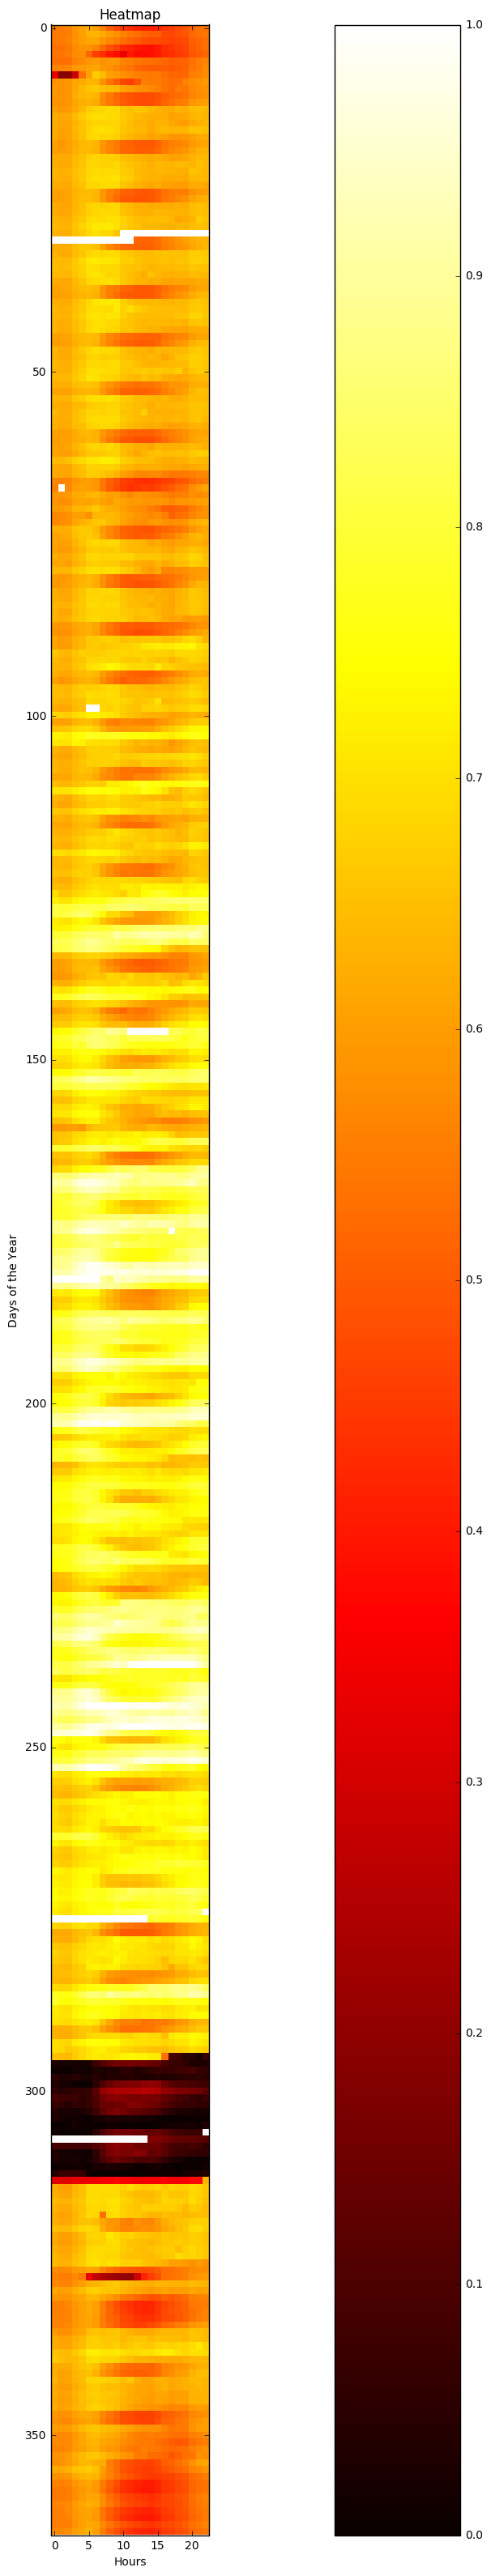

In [10]:
# Your code goes here...
# columnmean=loadCurves.mean().mean()

# loadCurves=loadCurves/columnmean

loadCurves_Norm=(loadCurves-loadCurves.min())/(loadCurves.max()-loadCurves.min())

loadCurves_Norm=loadCurves_Norm.drop(loadCurves_Norm.columns[0],axis=1)

fig=plt.figure(figsize=(40,40))

plt.title('Heatmap')
plt.xlabel('Hours')
plt.ylabel('Days of the Year')

plt.imshow(loadCurves_Norm,cmap='hot',interpolation='nearest')
plt.colorbar()

In [11]:
loadCurves_mat=loadCurves.as_matrix()
# maxval = loadCurves_mat.max()
# minval = loadCurves_mat.min()
loadCurves_mat = (loadCurves_mat-loadCurves_mat.min())/(loadCurves_mat.max()-loadCurves_mat.min())
# plt.figure(figsize = (25,25))
# plt.imshow(loadCurves_mat, cmap= 'hot', interpolation = 'nearest')
# plt.colorbar()

# Task \#8 (20%)

Let's see if we can find some patterns in these load curves. Using your favorite implementation and flavor of the k-means algorithm, play around with clustering the daily loadCurves to see if we can find 2 or 3 clusters that would best differentiate between weekdays and weekends. In other words, perform k-means (or k-medioids, or whatever) on the dataset with $k \in \{2, 3\}$ and the dataset being 365 samples of 24-dimensional vectors.

Note: you will only check the weekend vs. weekday labels **after** clustering (i.e., do not use this attribute for clustering, but rather only the 24 average hourly consumption values).

In [19]:
# Your code goes here...
from mpl_toolkits.mplot3d import axes3d
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans
from pylab import plot,show

model=KMeans(n_clusters=2)

loadCurves1=loadCurves
loadCurves1=loadCurves1.fillna(value=0)
loadCurves_Matrix=loadCurves1.as_matrix()
model.fit(loadCurves_Matrix)

# model.labels_

# model.cluster_centers_

X=loadCurves_Matrix

estimator = KMeans(n_clusters=3, random_state=0)
# X = loadCurves_Matrix.values.reshape(len(loadCurves_Matrix), 1)
cluster = estimator.fit_predict(X)

X[cluster==0].mean()
X[cluster==1].mean()  
X[cluster==2].mean()

#Part1

centroids,_=kmeans(X,2)
idx,_=vq(X,centroids)
# plot(X[idx==0,0],X[idx==0,1],'ob',
#      X[idx==1,0],X[idx==1,1],'or')
# plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
# show()

#Part2
centroids,_ = kmeans(X,3)
idx,_ = vq(X,centroids)
# plot(X[idx==0,0],X[idx==0,1],'ob',
#      X[idx==1,0],X[idx==1,1],'or',
#      X[idx==2,0],X[idx==2,1],'og') # third cluster points
# plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
# show()

#This code is just for reference -- please do not grade this part I was studiyng clustering in this cell and would like to maintain this cell

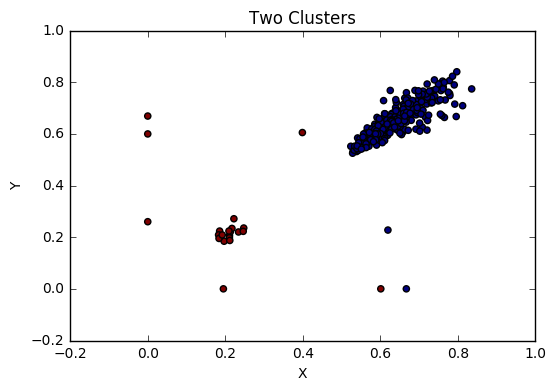

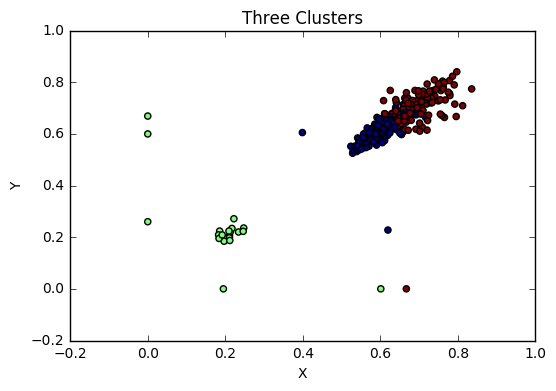

In [17]:
from mpl_toolkits.mplot3d import axes3d
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans
from pylab import plot,show

loadCurves_INT=loadCurves.fillna(value=0)
loadCurves_mat=loadCurves_INT.as_matrix()

loadCurves_mat=(loadCurves_mat-loadCurves_mat.min())/(loadCurves_mat.max()-loadCurves_mat.min())

Y=loadCurves_mat

km=KMeans(n_clusters=2,init='k-means++').fit(Y)
y_pred=km.fit_predict(Y)

plt.scatter(Y[:,0],Y[:,23],c=y_pred)
plt.title('Two Clusters')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()  

km=KMeans(n_clusters=3,init='k-means++').fit(Y)
y_pred=km.fit_predict(Y)

plt.scatter(Y[:,0],Y[:,23],c=y_pred)
plt.title('Three Clusters')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

# Task \#9 (10%)

In separate plots (one for each cluster), plot the cluster centroids (in a dark, thick line) and the load curves that belong to the cluster (using thin grayish lines), just like the paper did. 

What did you learn from the experiment above?

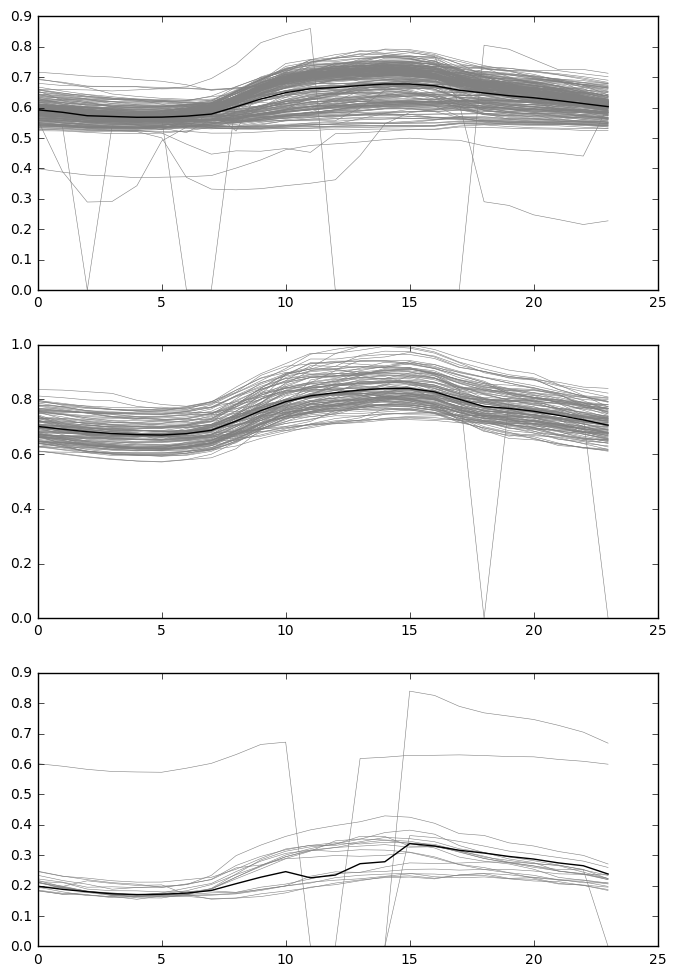

In [14]:
# Your code goes here...
a=[]

a.append(X[cluster==0].mean())

a.append(X[cluster==1].mean())

a.append(X[cluster==2].mean())

# model.cluster_centers_

cc_r = km.cluster_centers_
c1=np.where(y_pred==0)
c2=np.where(y_pred==1)
c3=np.where(y_pred==2)

fig,ax=plt.subplots(3,1,figsize=(8,12))

for x in np.nditer(c1):
    ax[0].plot(Y[x],"grey",linewidth=0.4)
ax[0].plot(cc_r[0],"black")

for x in np.nditer(c2):
    ax[1].plot(Y[x],"grey",linewidth=0.4)
ax[1].plot(cc_r[1],"black")

for x in np.nditer(c3):
    ax[2].plot(Y[x],"grey",linewidth=0.4)
ax[2].plot(cc_r[2],"black")

We learn't how to partion input variables into clusters and then plot the corresponding load curves for specific centroid values. In this case we see that having three clusters is more useful than having two as the weekend and weekday data points can be better differentiated. Additonally, we find that clustering using kmeans is tought becasue predicting k-values is difficult, and doesn't work well with global clusters. Also, different initial partitions could possibly result in different final clusters. According to my analysis and little bit of searching I would assume that kmeans would not work with clusters of different data densities.